In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#CHECKING MISSING VALUES
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
#CHECKING DUPLICATES
df.duplicated().sum()

np.int64(0)

In [5]:
#DATA TYPES OF EACH COLUMN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
#NUMBER OF UNIQUE VALUES IN EACH COLUMN
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [7]:
#STATISTICS OF DATASET
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
#No.of catregories in each column
print(f'No.of categories in gender {df['gender'].unique()}')
print(f'No.of categories in race/ethnicity {df['race/ethnicity'].unique()}')
print(f'No.of categories in parental level of education {df['parental level of education'].unique()}')

No.of categories in gender ['female' 'male']
No.of categories in race/ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
No.of categories in parental level of education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [9]:
#Categorize numerical and categorical features
num_features =[col for col in df.columns if df[col].dtype != 'object']
cat_features=[col for col in df.columns if df[col].dtype == 'object']
print(f'Numerical features {num_features}')
print(f'Categorical features {cat_features}')

Numerical features ['math score', 'reading score', 'writing score']
Categorical features ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [10]:
#ADDING COLUMNS FOR TOTAL SCORE AND AVERAGE
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average score']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [11]:
#STUDENTS WITH FULL MARKS SUBJECT WISE
math_full=df[df['math score']==100]
reading_full=df[df['reading score']==100]
writing_full=df[df['writing score']==100]
print(f'Student with full marks in Maths:{math_full['gender'].count()}')
print(f'Student with full marks in Reading:{reading_full['gender'].count()}')
print(f'Student with full marks in Writing:{writing_full['gender'].count()}')

Student with full marks in Maths:7
Student with full marks in Reading:17
Student with full marks in Writing:14


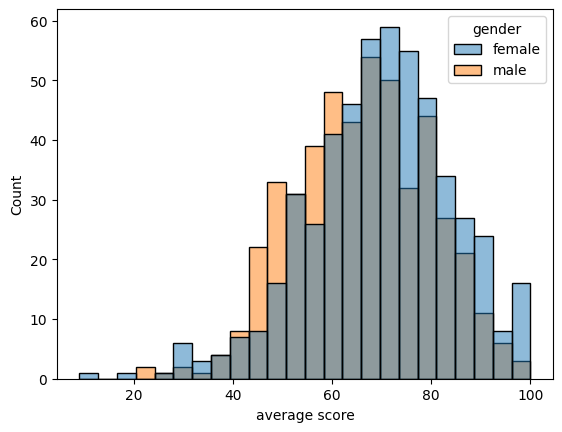

In [12]:
#VIZUALIZE AVERAGE SCORE OF MALE AND FEMALE
import matplotlib.pyplot as plt
import seaborn as sns
#PLOTTING HISTOGRAM
sns.histplot(data=df,x='average score',hue='gender')
plt.show()

MODEL TRAINING

In [13]:
#SEGREGATING X AND Y
X=df.drop(columns=['average score'])
y=df['average score']

In [14]:
#PIPELINE FOR SCALING AND ENCODING
numerical_features=[col for col in X.columns if X[col].dtype!='object']
categorical_features=[col for col in X.columns if X[col].dtype=='object']
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
sc=StandardScaler()
ohe=OneHotEncoder()
ct=ColumnTransformer([('sc',sc,numerical_features),('ohe',ohe,categorical_features)])

In [15]:
X=ct.fit_transform(X)

In [16]:
#TRAIN-TEST SPLITfrom sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
#FUNCTION TO EVALUATE MODELS
import numpy as np
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def evaluate_models(true,predicted):
  mae=mean_absolute_error(true,predicted)
  mse=mean_squared_error(true,predicted)
  rmse=np.sqrt(mse)
  r2=r2_score(true,predicted)
  return mae,mse,r2   

In [18]:
#MODEL PIPELINE
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
models={'lr':LinearRegression(),'lasso':Lasso(),'ridge':Ridge(),'elasticnet':ElasticNet()}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  mae,mse,r2=evaluate_models(y_test,y_pred)
  model_list.append(list(models.keys())[i])
  r2_list.append(r2)

In [19]:
#DATAFRAME WITH MODEL LIST AND r2 SCORE 
#pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False)
new_df=pd.DataFrame({'Model_Name':model_list,'R2_Score':r2_list})
new_df.sort_values(by='R2_Score', ascending=False, inplace=True)
new_df

,Model_Name,R2_Score
0,lr,1.000000
2,ridge,1.000000
1,lasso,0.994801
3,elasticnet,0.976118
